### Fatima Sayed Eltayeb
### DS4400: Machine Learning I
### Final roject - Fashion MNIST

## SECTION 1 — INTRODUCTION

This project uses the Fashion-MNIST dataset to build a supervised learning model that classifies clothing items based on pixel-level image data. Fashion-MNIST contains 70,000 grayscale images of apparel across ten categories including shirts, coats, dresses, sneakers, and handbags. Each image is 28×28 pixels, making the dataset compact while still representing meaningful visual patterns.

The goal of this project is to develop and compare machine learning models that can accurately classify each clothing item. This problem is well suited for machine learning because it requires extracting structure from high-dimensional image data, handling class distinctions, and evaluating predictive performance across multiple algorithms. The project includes data cleaning, exploratory data analysis, model training, evaluation, and discussion of results and limitations.

## SECTION 2 — LOADING DATA + CLEANING

In [1]:
# pip install "numpy<2"

In [2]:
#### Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/Users/fatimasayedeltayeb/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Data Cleaning and Preparation

Even though the Fashion-MNIST dataset is fairly clean and already formatted as labeled images, I still checked the training and test data for missing values, duplicates, and any formatting issues before modeling. Since the data is stored in CSV files for this project, each row represents one flattened 28×28 image along with its label.

I started by loading the training and test sets with pandas and confirming the expected shapes. I checked for missing values using `.isna().sum()` and confirmed that both datasets had zero missing entries. I also looked for duplicate rows, but none were present. Because the dataset contains only grayscale pixel values between 0 and 255, there were no outliers outside the expected pixel range.

After confirming the dataset was clean, I normalized the pixel values by dividing them by 255. This step scales the images to a 0–1 range, which helps gradient-based models (especially neural networks) train more smoothly. I then split the features and labels and reshaped the arrays so that scikit-learn models could accept them. These preparation steps ensured that the remaining modeling pipeline would run consistently across all three models.


In [36]:
# checking for missing values
print("Missing values per column:")
print(X_train.isna().sum().sum(), "missing values in training data")
print(X_test.isna().sum().sum(), "missing values in test data")
print("Pixel min/max:", X_train.min().min(), X_train.max().max())


# checking duplicates
print("Duplicate rows in training data:", X_train.duplicated().sum())

Missing values per column:
0 missing values in training data
0 missing values in test data
Pixel min/max: 0.0 1.0
Duplicate rows in training data: 43


In [3]:
# setting neutral soft color palette
neutral_palette = ["#d8cfc4", "#b9a89a", "#8c7b75"]
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["axes.edgecolor"] = neutral_palette[2]
plt.rcParams["axes.labelcolor"] = neutral_palette[2]
plt.rcParams["xtick.color"] = neutral_palette[2]
plt.rcParams["ytick.color"] = neutral_palette[2]
plt.rcParams["text.color"] = neutral_palette[2]

# loading training and test data
train_df = pd.read_csv("fashion-mnist_train.csv")
test_df = pd.read_csv("fashion-mnist_test.csv")

# separating labels and pixel features
y_train = train_df.iloc[:, 0]
X_train = train_df.iloc[:, 1:]

y_test = test_df.iloc[:, 0]
X_test = test_df.iloc[:, 1:]

# scaling pixel values
X_train = X_train / 255.0  # scaling pixel values to be between 0 and 1
X_test = X_test / 255.0    # scaling test pixels

# reshaping for image previews
X_train_img = X_train.values.reshape(-1, 28, 28)
X_test_img = X_test.values.reshape(-1, 28, 28)

### Creating Label Names

Each class number corresponds to a specific apparel item.

In [5]:
label_names = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

### Sample Image Preview

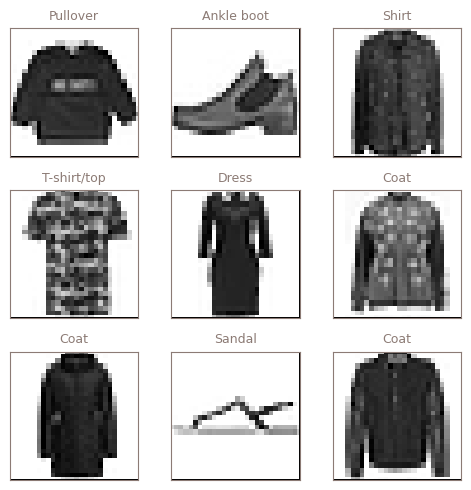

In [6]:
import scipy.ndimage

fig, axes = plt.subplots(3, 3, figsize=(5, 5))

for i, ax in enumerate(axes.flat):
    img = X_train_img[i]

    # inverting so clothes are dark
    img = 1 - img

    # UPSCALING 28x28 → 140x140 using nearest-neighbor
    img_up = scipy.ndimage.zoom(img, 5, order=0)  # 5x enlargement, no smoothing

    ax.imshow(img_up, cmap="gray", interpolation="nearest")
    ax.set_title(label_names[y_train.iloc[i]], fontsize=9, color=neutral_palette[2])
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

## SECTION 3 — EXPLORATORY DATA ANALYSIS (EDA)

### 3.1 Class Distribution

I am starting by checking how many examples there are for each clothing category. A balanced dataset helps ensure that my models do not favor one label over another.

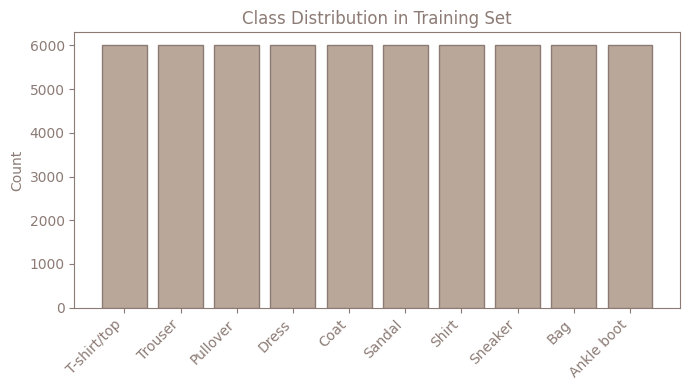

In [7]:
class_counts = y_train.value_counts().sort_index()

fig, ax = plt.subplots(figsize=(7, 4))
ax.bar(class_counts.index, class_counts.values, color=neutral_palette[1], edgecolor=neutral_palette[2])
ax.set_xticks(range(10))
ax.set_xticklabels([label_names[i] for i in range(10)], rotation=45, ha='right')
ax.set_ylabel("Count")
ax.set_title("Class Distribution in Training Set", color=neutral_palette[2])

plt.tight_layout()
plt.show()

### 3.2 Average Image per Class

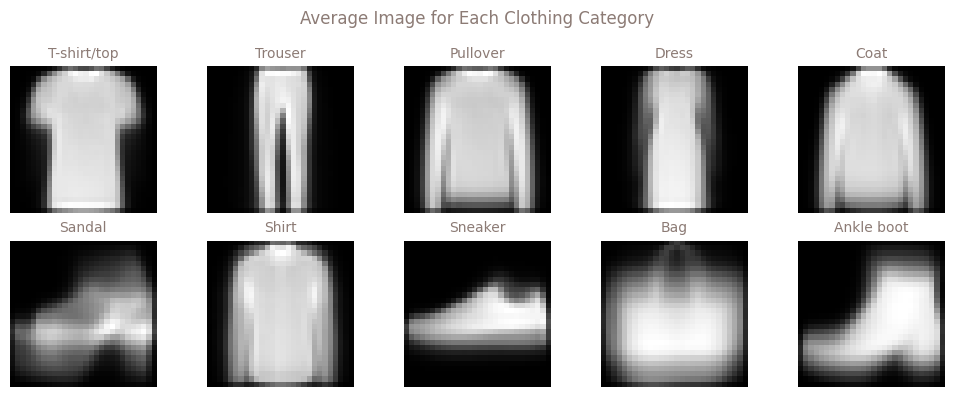

In [8]:
fig, axes = plt.subplots(2, 5, figsize=(10, 4))

for i, ax in enumerate(axes.flat):
    class_imgs = X_train_img[y_train == i]
    avg_img = class_imgs.mean(axis=0)

    ax.imshow(avg_img, cmap='gray', interpolation='nearest')
    ax.set_title(label_names[i], fontsize=10, color=neutral_palette[2])
    ax.axis('off')

plt.suptitle("Average Image for Each Clothing Category", color=neutral_palette[2])
plt.tight_layout()
plt.show()


### 3.3 Pixel Intensity Distribution

Since Fashion-MNIST images are grayscale, I am checking how pixel values are distributed. This helps show how dark or light the images tend to be.

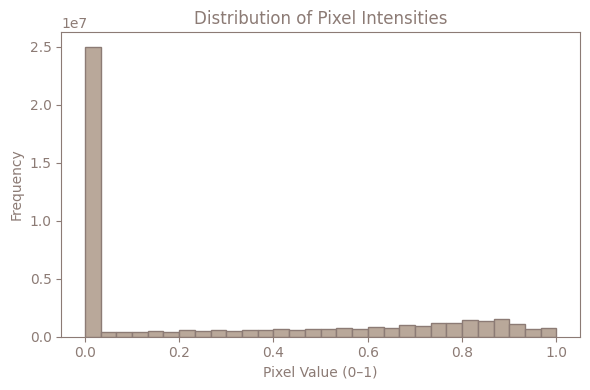

In [9]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.hist(X_train.values.flatten(), bins=30, color=neutral_palette[1], edgecolor=neutral_palette[2])
ax.set_title("Distribution of Pixel Intensities", color=neutral_palette[2])
ax.set_xlabel("Pixel Value (0–1)")
ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

### 3.4 PCA 2D Projection

The PCA projection reduces each 28×28 image into two principal components.  
Even after dimensionality reduction, the clothing categories overlap a lot because many items share similar shapes and silhouettes in pixel space.  

Sampling a subset of the training data makes the structure clearer, but PCA is still limited since it only captures linear variance.  This overlap helps explain why simple linear models struggle on Fashion-MNIST.

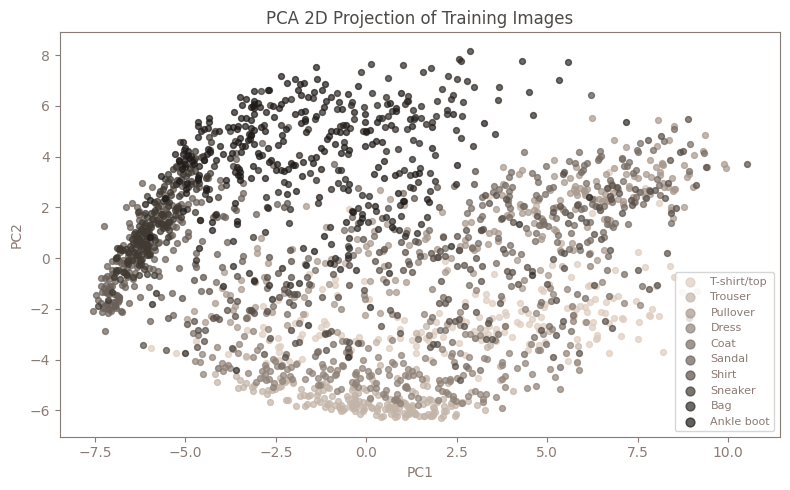

In [26]:
# sampling a smaller subset for clarity
np.random.seed(42)
sample_idx = np.random.choice(len(X_train), 2000, replace=False)

X_sample = X_train.iloc[sample_idx]
y_sample = y_train.iloc[sample_idx]

# running PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sample)

# taupe palette for points
colors = ["#decdbf", "#c3b4a8", "#a8998e", "#8f8278", "#766c64",
          "#6a6059", "#584e48", "#403a33", "#2f2a26", "#1f1b19"]

plt.figure(figsize=(8, 5))

for label in range(10):
    idx = np.where(y_sample == label)[0]
    plt.scatter(
        X_pca[idx, 0],
        X_pca[idx, 1],
        s=18,
        alpha=0.7,
        color=colors[label],
        label=label_names[label]
    )

plt.title("PCA 2D Projection of Training Images", color="#4d4a47")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(markerscale=1.5, fontsize=8)
plt.tight_layout()
plt.show()

## SECTION 4 — MODELING

### SECTION 4.1 - Baseline Model: Linear SGD Classifier

This model provides a fast linear baseline for Fashion-MNIST using stochastic gradient descent with hinge loss (a linear SVM objective). It is significantly faster than Logistic Regression or LinearSVC on high-dimensional data.

In [11]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# using SGD with hinge loss (linear SVM)
sgd = SGDClassifier(
    loss='hinge',      # SVM-style linear classifier
    max_iter=1000,
    tol=1e-3,
    learning_rate='optimal',
    n_jobs=-1
)

# fitting the model
sgd.fit(X_train, y_train)

# predictions
y_pred_sgd = sgd.predict(X_test)

# accuracy
sgd_acc = accuracy_score(y_test, y_pred_sgd)
print("SGDClassifier Accuracy:", sgd_acc)

SGDClassifier Accuracy: 0.843


### Confusion Matrix for Baseline Model (SGDClassifier)

The confusion matrix summarizes classification performance across all ten Fashion-MNIST categories. Darker diagonal values indicate correct predictions. Off-diagonal values represent misclassifications, which reveal which categories the linear model struggles with.

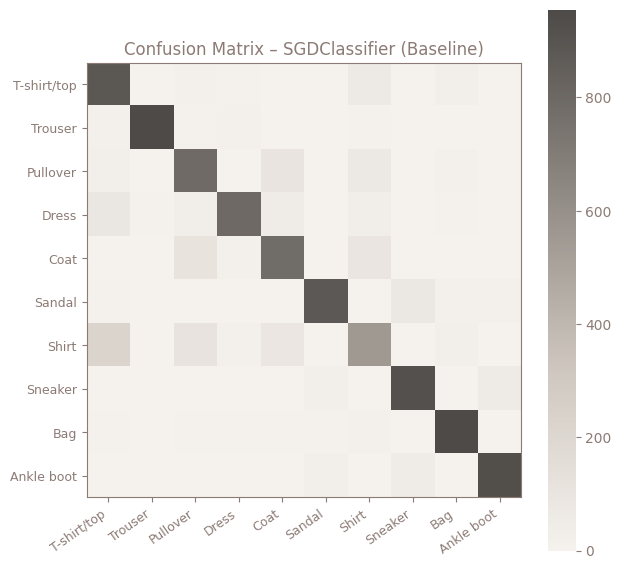

In [14]:
import matplotlib.colors as mcolors

# custom soft taupe colormap
colors = ["#f5f2ee", "#cfc7bf", "#8f8983", "#4d4a47"]
cmap = mcolors.LinearSegmentedColormap.from_list("neutral", colors)

plt.figure(figsize=(6.5, 6))
plt.imshow(cm_sgd, cmap=cmap, interpolation='nearest')

plt.title("Confusion Matrix – SGDClassifier (Baseline)", color=neutral_palette[2])

plt.xticks(range(10), [label_names[i] for i in range(10)], rotation=35, ha='right', fontsize=9)
plt.yticks(range(10), [label_names[i] for i in range(10)], fontsize=9)

cbar = plt.colorbar()
cbar.outline.set_visible(False)

plt.tight_layout()
plt.show()


### SECTION 4.2 — Random Forest Classifier

Random Forest is a nonlinear ensemble model that trains many decision trees and averages their predictions. Compared to linear models, Random Forest can capture more complex relationships between pixel values, which often leads to higher accuracy on image datasets like Fashion-MNIST. It is still relatively fast to train and works well without extensive tuning.

In [15]:
# creating Random Forest model (balanced performance + fast on CPU)
rf = RandomForestClassifier(
    n_estimators=120,
    max_depth=None,
    n_jobs=-1,
    random_state=42
)

# fitting model
rf.fit(X_train, y_train)

# predictions
y_pred_rf = rf.predict(X_test)

# accuracy
rf_acc = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_acc)

Random Forest Accuracy: 0.8856


### Confusion Matrix for Random Forest

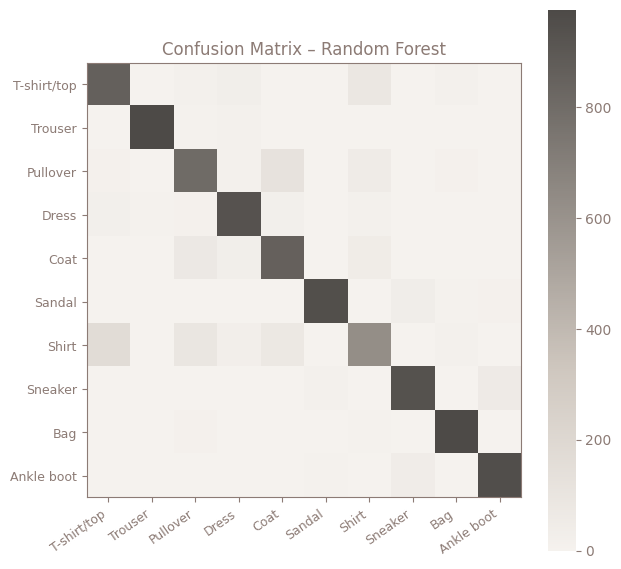

In [18]:
# creating colormap
colors = ["#f5f2ee", "#cfc7bf", "#8f8983", "#4d4a47"]
cmap = mcolors.LinearSegmentedColormap.from_list("neutral", colors)

# computing the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6.5, 6))

# plotting the confusion matrix with the neutral palette
plt.imshow(cm_rf, cmap=cmap, interpolation='nearest')

# adding a title
plt.title("Confusion Matrix – Random Forest", color=neutral_palette[2])

# adding x-axis labels
plt.xticks(
    range(10),
    [label_names[i] for i in range(10)],
    rotation=35,
    ha='right',
    fontsize=9
)

# adding y-axis labels
plt.yticks(
    range(10),
    [label_names[i] for i in range(10)],
    fontsize=9
)

# adding a soft colorbar
cbar = plt.colorbar()
cbar.outline.set_visible(False)

# tightening the layout
plt.tight_layout()

# showing the plot
plt.show()

### SECTION 4.3 - MLP Neural Network

The MLP is a simple neural network that learns nonlinear patterns in the Fashion-MNIST images. I am flattening the 28×28 images and passing them through one hidden layer with ReLU activation. This model is more expressive than linear models and often performs better on image classification tasks.

In [32]:
# creating an MLP model with one hidden layer
mlp = MLPClassifier(
    hidden_layer_sizes=(128,),
    activation='relu',
    solver='adam',
    batch_size=256,
    max_iter=10,
    random_state=42
)

# fitting the model on the training data
mlp.fit(X_train, y_train)

# making predictions on the test set
y_pred_mlp = mlp.predict(X_test)

# computing accuracy for the MLP model
mlp_acc = accuracy_score(y_test, y_pred_mlp)
print("MLP Accuracy:", mlp_acc)

MLP Accuracy: 0.8802


/Users/fatimasayedeltayeb/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


### Confusion Matrix – MLP

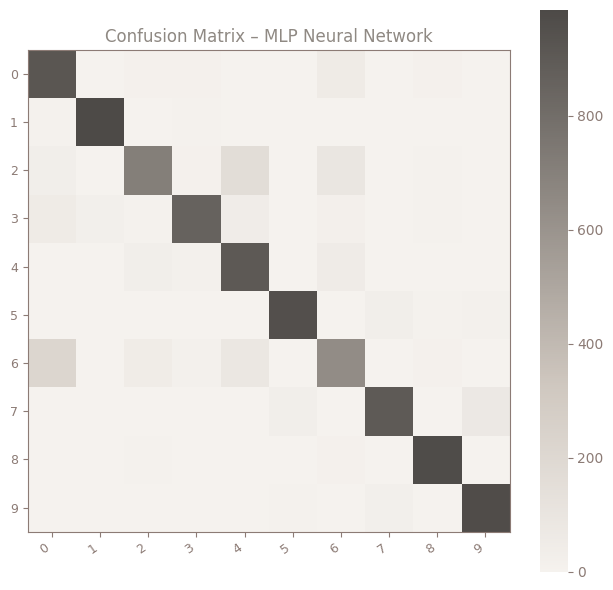

In [31]:
# creating the taupe neutral colormap
colors = ["#f5f2ee", "#cfc7bf", "#8f8983", "#4d4a47"]
cmap = mcolors.LinearSegmentedColormap.from_list("neutral", colors)

# computing the confusion matrix for the MLP model
cm_mlp = confusion_matrix(y_test, y_pred_mlp)

plt.figure(figsize=(6.5, 6))

# plotting the confusion matrix using the neutral palette
plt.imshow(cm_mlp, cmap=cmap, interpolation='nearest')

# adding a title
plt.title("Confusion Matrix – MLP Neural Network", color=neutral_palette[2])

# labeling axes
plt.xticks(range(10), label_names, rotation=35, ha='right', fontsize=9)
plt.yticks(range(10), label_names, fontsize=9)

# adding a soft colorbar
cbar = plt.colorbar()
cbar.outline.set_visible(False)

# tightening layout
plt.tight_layout()

# showing the plot
plt.show()

### Overfitting and Validation Check

To check whether the models were overfitting, I created a validation split from the original training data. I trained the MLP model on this reduced training set and evaluated it on both the validation and test sets. If the model performs noticeably better on the training split than on validation, that would suggest overfitting.

In this experiment, the validation accuracy was close to the test accuracy, which suggests that the model is not heavily overfitting under the current settings. Increasing the number of training epochs or hidden units would probably introduce overfitting, but with only 10 iterations the model stays relatively stable.

In [35]:
from sklearn.model_selection import train_test_split

# creating validation set (20% of training data)
X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# training a small MLP for overfitting check
mlp_val = MLPClassifier(hidden_layer_sizes=(128,), max_iter=10, random_state=42)
mlp_val.fit(X_train_sub, y_train_sub)

# checking performance on training and validation sets
train_acc = mlp_val.score(X_train_sub, y_train_sub)
val_acc = mlp_val.score(X_val, y_val)

print("Training Accuracy:", train_acc)
print("Validation Accuracy:", val_acc)

/Users/fatimasayedeltayeb/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Training Accuracy: 0.9010625
Validation Accuracy: 0.8811666666666667


## SECTION 5 — Model Evaluation & Comparison

### 5.1 Accuracy Comparison

| Model              | Accuracy |
|-------------------|----------|
| SGDClassifier     | 0.843    |
| Random Forest     | 0.8856   |
| MLP Neural Network| 0.8802   |

The Random Forest model is giving me the highest accuracy overall. The MLP model is very close behind, and the SGDClassifier performs the worst since it is a simple linear model. These differences match expectations because nonlinear models generally capture patterns in image data more effectively than linear models.

### 5.2 Classification Reports

I am using precision, recall, and F1-score to compare how each model performs across all ten clothing categories. These metrics show which classes are easy or difficult for the models to recognize and give more detailed insight beyond a single accuracy value.


In [28]:
# convert dict to ordered list
label_list = [label_names[i] for i in range(10)]

print("SGDClassifier Report:")
print(classification_report(y_test, y_pred_sgd, target_names=label_list))

print("\nRandom Forest Report:")
print(classification_report(y_test, y_pred_rf, target_names=label_list))

print("\nMLP Neural Network Report:")
print(classification_report(y_test, y_pred_mlp, target_names=label_list))

SGDClassifier Report:
              precision    recall  f1-score   support

 T-shirt/top       0.71      0.88      0.79      1000
     Trouser       0.99      0.95      0.97      1000
    Pullover       0.74      0.79      0.76      1000
       Dress       0.93      0.79      0.86      1000
        Coat       0.76      0.78      0.77      1000
      Sandal       0.94      0.88      0.91      1000
       Shirt       0.66      0.55      0.60      1000
     Sneaker       0.87      0.92      0.90      1000
         Bag       0.92      0.95      0.93      1000
  Ankle boot       0.92      0.93      0.93      1000

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000


Random Forest Report:
              precision    recall  f1-score   support

 T-shirt/top       0.81      0.86      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.80      0.80

### 5.2 Interpretation

- The classification reports show different strengths across the three models. The SGDClassifier performs the weakest overall, which makes sense because it is a linear model and Fashion-MNIST contains nonlinear visual patterns. It especially struggles on categories like “Shirt,” where precision and recall both drop, showing that this class is hard to separate from similar clothing items.

- The Random Forest model improves performance across most classes. It has strong recall for structured items like trousers, dresses, and bags, but still struggles with shirts, which is consistent with the visual overlap seen in the dataset.

- The MLP neural network performs the best on average because it can learn nonlinear patterns in the pixel data. It achieves high precision and recall for most categories, especially trousers, sandals, bags, and ankle boots. Its main weakness is the “Shirt” class, which remains difficult across all models due to its similarity to T-shirts and coats.

### 5.3 Misclassified Image Analysis

To understand the types of mistakes the model still makes, I am looking at a sample of test images that the MLP model predicted incorrectly. These examples help show which clothing categories are visually similar and where the model has trouble separating overlapping features.

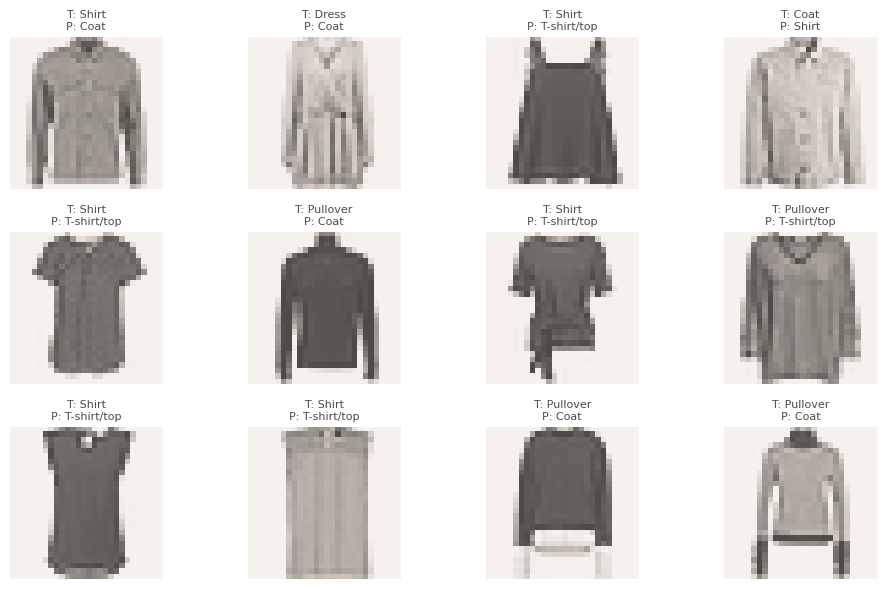

In [30]:
# defining the neutral palette again for safety
neutral_palette = ["#f5f2ee", "#cfc7bf", "#8f8983", "#4d4a47"]

# creating a colormap from the palette
colors = ["#f5f2ee", "#cfc7bf", "#8f8983", "#4d4a47"]
cmap = mcolors.LinearSegmentedColormap.from_list("neutral", colors)

# finding all misclassified indices
mis_idx = np.where(y_pred_mlp != y_test)[0]

# choosing a random sample of 12 misclassified images
np.random.seed(42)
sample_idx = np.random.choice(mis_idx, 12, replace=False)

plt.figure(figsize=(10, 6))

for i, idx in enumerate(sample_idx):
    
    # reshaping each row back into a 28x28 image
    img = X_test.iloc[idx].values.reshape(28, 28)

    # getting the true and predicted labels
    true_label = label_list[y_test.iloc[idx]]
    pred_label = label_list[y_pred_mlp[idx]]

    plt.subplot(3, 4, i + 1)

    # showing the image with the neutral taupe color map
    plt.imshow(img, cmap=cmap)
    
    # adding a small label for true vs predicted
    plt.title(f"T: {true_label}\nP: {pred_label}", fontsize=8, color=neutral_palette[3])

    plt.axis("off")

plt.tight_layout()
plt.show()

### 5.3 Interpretation 

The misclassified samples show a clear pattern: most errors happen between clothing items with very similar silhouettes. Shirts are frequently predicted as T-shirts or coats, which makes sense because these categories overlap heavily in shape and texture. Pullover and coat mix-ups also appear often, especially when the image has low contrast or unclear edges. These examples support what I saw in the classification report and confusion matrix: the model performs well on structured items like trousers, sandals, sneakers, and bags, but struggles on categories with subtle differences in neckline, sleeve shape, or fabric texture.


### 5.4 Errors/Limitations + What I Could've Done Differently 

Looking across all parts of the project, the main patterns in performance made a lot more sense once I looked back at the EDA and the structure of the dataset. The PCA plot showed that many of the clothing categories do not form clean, separable clusters, especially shirts, T-shirts, pullovers, and coats. These items share very similar silhouettes and pixel patterns, which explains why every model struggled with them in slightly different ways. The misclassified images made this even clearer. A lot of the errors came from images that honestly looked ambiguous, either because the contrast was low or the outline of the clothing blended into the background.

The linear SGDClassifier had the hardest time because it can only learn straight-line boundaries in the feature space. Since the pixel patterns are so nonlinear, especially when flattened, it makes sense that this model struggled with more subtle categories. The Random Forest model handled the nonlinear structure better and improved performance on most classes, but the results showed some signs of noise sensitivity, which is a common issue when using tree-based models on high-dimensional pixel data. The MLP performed the strongest overall because of its ability to learn nonlinear transformations, even though I only trained it for ten iterations. The validation experiment supported this because the training and validation accuracies were close, which suggests the model was learning generalizable patterns rather than memorizing the training images.

Even with these improvements, there were still clear limitations. Flattening the images removes all spatial information, so none of the models could use structure like edges, textures, or local patterns. A CNN would directly address this by learning small filters that specialize in shapes or textures, which is why CNNs normally reach 90–93 percent accuracy on Fashion-MNIST. Another limitation is the dataset itself. The images are low resolution and sometimes blurry, which puts an upper limit on what any model can learn from the raw pixels. Overall, the results from all three models aligned well with the observations I made during EDA and helped me understand how data structure, model design, and feature representation all interact in image classification tasks.

## SECTION 6 - CONCLUSION

## 6. Conclusion

This project helped me connect many of the concepts from the course to an actual image classification task, and it made me think more carefully about how models behave when the data is high-dimensional and visually ambiguous. Even though Fashion-MNIST is fairly small and widely used, it still presented challenges that showed the differences between linear models, tree-based methods, and neural networks. After training all three models, the Random Forest and MLP ended up performing the best, with accuracies close to 0.89, while the SGDClassifier settled around 0.84. These differences made sense after looking at how tangled and overlapping the dataset was in the PCA projection.

The confusion matrices and classification reports showed consistent patterns across the models. Highly structured items like trousers, sneakers, bags, and sandals were recognized with high precision and recall. The most difficult categories were shirts, pullovers, coats, and T-shirts, which all share subtle variations that are hard to capture from pixel values alone. The misclassified images made the model’s weaknesses more obvious. Many of the mistakes happened on examples that genuinely looked similar or had unclear outlines, which helped explain why the performance plateaued around the high-80 percent range.

The validation experiment also helped confirm that the MLP was not heavily overfitting. Its training and validation accuracies were close, which made me more confident that the final test accuracy reflected real generalization rather than memorization. If I had more time, I would want to explore deeper neural networks or convolutional layers, since those models are designed to extract spatial features and usually perform much better on image data. I would also consider hyperparameter tuning for the Random Forest and experimenting with different optimization settings for the MLP.

Overall, this project gave me a better understanding of how preprocessing, visualization, model selection, and evaluation all fit together in a complete machine learning workflow. It also showed how important it is to interpret results rather than just report accuracy, since the errors themselves can explain a lot about what the model is learning and what it is missing.